## Hipóteses & Lucros: Análise A/B Online

Neste projeto, conduzido em uma grande loja online, nos propomos a potencializar as receitas mediante a identificação e avaliação de estratégias de marketing inovadoras.

In [4]:
import pandas as pd
import numpy as np
import matplotlib as plot
import statistics
import scipy.stats as stats
import datetime as dt
from scipy.stats import probplot
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## Pré-processamento de Dados 
É a correção e organização dos dados antes da análise. Essa etapa assegura precisão e confiabilidade, sendo essencial para obter resultados consistentes.

In [5]:
hypotheses = pd.read_csv(r'C:\Users\PC\Desktop\portifolio\Hipóteses & Lucros Análise AB Online\hypotheses_us.csv', sep=';')
orders = pd.read_csv(r'C:\Users\PC\Desktop\portifolio\Hipóteses & Lucros Análise AB Online\orders_us.csv')
visits = pd.read_csv(r'C:\Users\PC\Desktop\portifolio\Hipóteses & Lucros Análise AB Online\visits_us.csv')


In [6]:
hypotheses.head(10)

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


* Hypotheses — breves descrições das hipóteses
* Reach — alcance do usuário, em uma escala de um a dez
* Impact — impacto nos usuários, em uma escala de um a dez
* Confidence — confiança na hipótese, em uma escala de um a dez
* Effort — os recursos necessários para testar uma hipótese, em uma escala de um a dez. Quanto maior o valor de Effort, mais recursos são necessários para o teste.

In [7]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


* date — data
* group — grupo de teste A/B
* visits — o número de visitas na data especificada para o grupo de teste A/B especificado

In [8]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


* transactionId — identificador do pedido
* visitorId — identificador do usuário que fez o pedido
* date — do pedido
* revenue — do pedido
* group — o grupo de teste A/B ao qual o usuário pertence

In [9]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [11]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [12]:
visits['date'] = pd.to_datetime(visits['date'])
orders['date'] = pd.to_datetime(orders['date'])

In [13]:
orders = orders.rename(columns= {'transactionId':'transaction_id', 'visitorId':'visitor_id'})
hypotheses.columns = [col.lower() for col in hypotheses.columns]
orders


,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


## Conclusão do capitulo 

Após feita a padronização do dados e um estudo mais profudo sobre a natureza dos mesmo, é possivel iniciar as analises e testes.  

## Priorização de hipoteses 

A priorização de hipóteses ajuda a direcionar recursos para as melhores iniciativas. O ICE pondera impacto, confiança e facilidade, enquanto o RICE adiciona o alcance e considera o esforço. Escolher entre eles depende das necessidades da equipe: ICE para rapidez e simplicidade, RICE para abrangência de alcance.


In [14]:
hypotheses['ice'] = (hypotheses['impact']*hypotheses['confidence'])/hypotheses['effort']
hypotheses.sort_values(by='ice', ascending= False)


,hypothesis,reach,impact,confidence,effort,ice
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000
5,Add a customer review page. This will increase...,3,2,2,3,1.333333
3,Change the category structure. This will incre...,8,3,3,8,1.125000
4,Change the background color on the main page. ...,3,1,1,1,1.000000


In [15]:
hypotheses['rice'] = (hypotheses['reach']*hypotheses['impact']*hypotheses['confidence'])/hypotheses['effort']
hypotheses.sort_values(by='rice', ascending= False)

,hypothesis,reach,impact,confidence,effort,ice,rice
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


## Conclusão do capitulo 

Apesar de haver alterações na ordem de prioridades de cada framework os 5 primeiros são os mesmo mas em posições distintas, portanto é importante alinhar as expectativas e metas da empresa para escolher qual dos dois usar, sendo assim indepedente da decisão tomada as 5 principais hipoteses serão as mesmas. 

## Análise de teste A/B 

um gráfico da receita acumulada por grupo. 

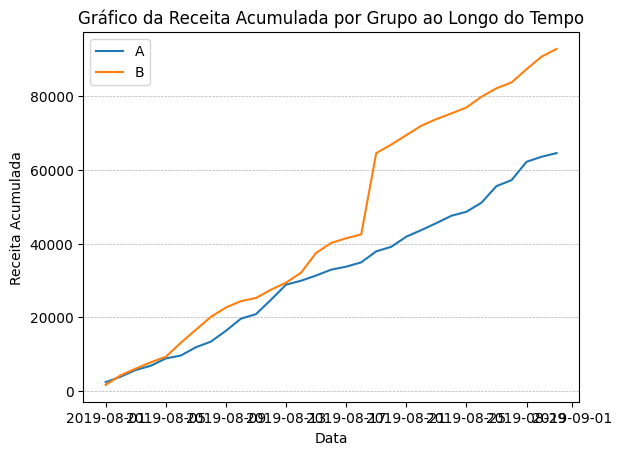

In [16]:

revenue_pivot = orders.pivot_table(index=['date', 'group'], values='revenue', aggfunc='sum')
revenue_pivot = revenue_pivot.groupby('group').cumsum()
revenue_pivot = revenue_pivot.reset_index()
for group in revenue_pivot['group'].unique():
    group_data = revenue_pivot[revenue_pivot['group'] == group]
    plt.plot(group_data['date'], group_data['revenue'], label=group)

plt.xlabel('Data')
plt.ylabel('Receita Acumulada')
plt.title('Gráfico da Receita Acumulada por Grupo ao Longo do Tempo')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


O grupo B possui uma receita total significamente maior. 

um gráfico do tamanho médio acumulado do pedido por grupo.

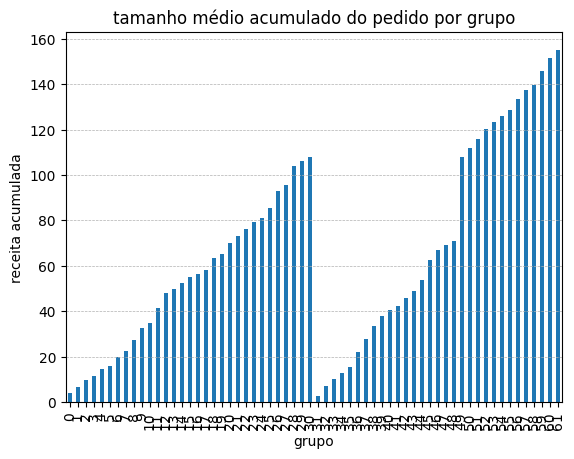

In [17]:
orders_mean_pivot = orders.pivot_table(index='group', values='visitor_id', aggfunc='count')
orders_mean_pivot['visitor_id'] = orders_mean_pivot['visitor_id'].mean()
orders_mean_pivot = orders_mean_pivot.merge(revenue_pivot, on= 'group')
orders_mean_pivot['mean'] = orders_mean_pivot['revenue']/orders_mean_pivot['visitor_id']
orders_mean_pivot['mean'].plot(kind='bar')
plt.xlabel('grupo')
plt.ylabel('receita acumulada')
plt.title('tamanho médio acumulado do pedido por grupo')
plt.grid(axis='y', linestyle='--', linewidth=0.5)

A receita média do grupo b é significamente maior que o grupo A 

taxa de conversão de cada grupo como a proporção de pedidos para o número de visitas para cada dia.

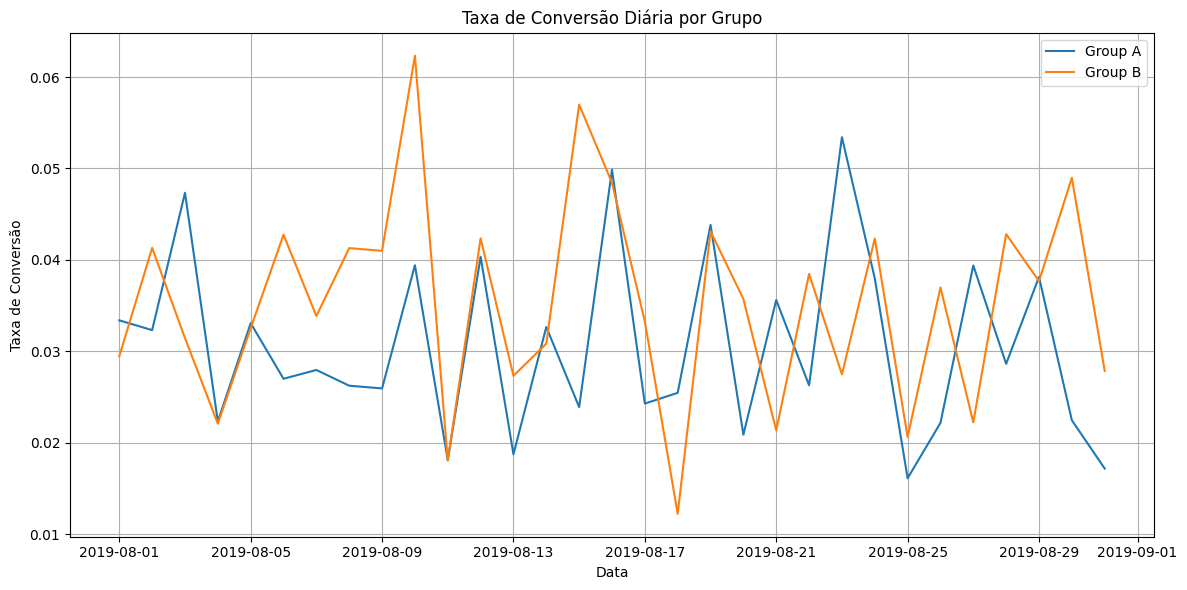

In [18]:
daily_orders = orders.groupby(['date', 'group'])['transaction_id'].count().reset_index()
merged_data = pd.merge(daily_orders, visits, on=['date', 'group'], how='left')
merged_data['conversion_rate'] = merged_data['transaction_id'] / merged_data['visits']
plt.figure(figsize=(12,6))
for group in merged_data['group'].unique():
    subset = merged_data[merged_data['group'] == group]
    plt.plot(subset['date'], subset['conversion_rate'], label=f'Group {group}')

plt.title('Taxa de Conversão Diária por Grupo')
plt.xlabel('Data')
plt.ylabel('Taxa de Conversão')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


O grupo B apresenta uma taxa de conversão maior que o grupo A. 

Um gráfico da diferença relativa na conversão cumulativa para o grupo B em comparação com o grupo A.

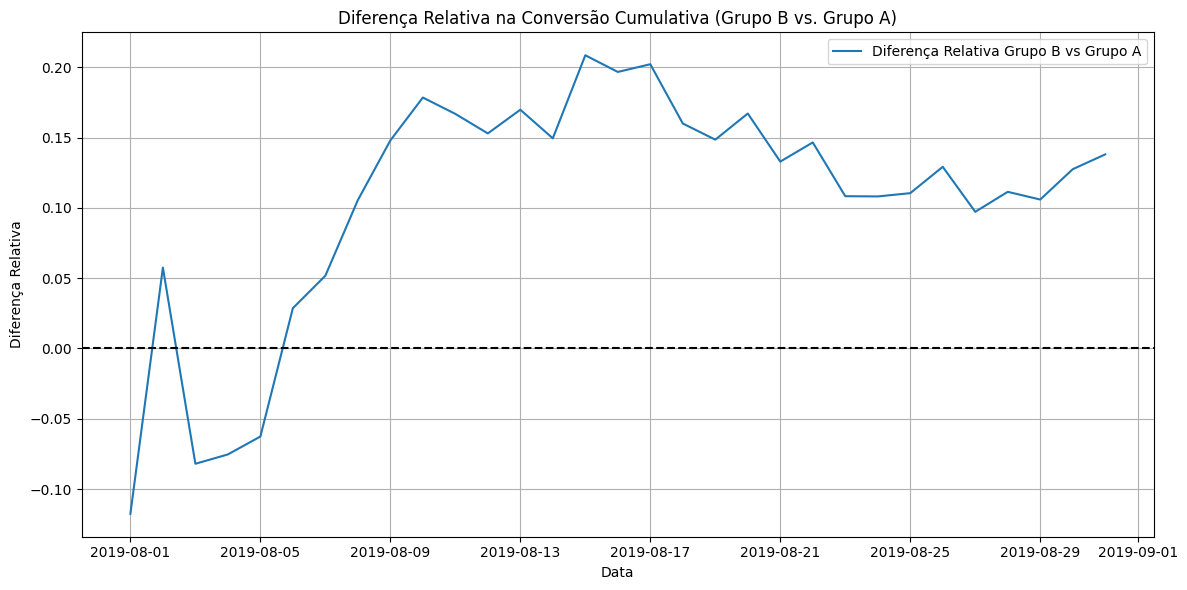

In [19]:

cumulative_orders = orders.groupby(['date', 'group']).agg({'transaction_id': 'nunique'}).groupby(level=1).cumsum().reset_index()
cumulative_visits = visits.groupby(['date', 'group']).agg({'visits': 'sum'}).groupby(level=1).cumsum().reset_index()
cumulative_data = pd.merge(cumulative_orders, cumulative_visits, on=['date', 'group'])
cumulative_data['conversion'] = cumulative_data['transaction_id'] / cumulative_data['visits']
cumulative_A = cumulative_data[cumulative_data['group'] == 'A']
cumulative_B = cumulative_data[cumulative_data['group'] == 'B']
merged_cumulative = pd.merge(cumulative_A, cumulative_B, on='date', suffixes=['_A', '_B'])
merged_cumulative['relative_diff'] = (merged_cumulative['conversion_B'] / merged_cumulative['conversion_A']) - 1
plt.figure(figsize=(12,6))
plt.plot(merged_cumulative['date'], merged_cumulative['relative_diff'], label="Diferença Relativa Grupo B vs Grupo A")
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Diferença Relativa na Conversão Cumulativa (Grupo B vs. Grupo A)')
plt.xlabel('Data')
plt.ylabel('Diferença Relativa')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Podemos ver que na diferença Relativa na Conversão Cumulativa o grupo B leva clara vantagem em relação ao A 

Os percentis 95 e 99 para o número de pedidos por usuário.

In [20]:
percentil_pivot = orders.pivot_table(index='visitor_id', values = 'transaction_id', aggfunc = 'count')
percentil_pivot.quantile(0.95)


transaction_id    2.0
Name: 0.95, dtype: float64

In [21]:
percentil_pivot.quantile(0.99)

transaction_id    4.0
Name: 0.99, dtype: float64

Valores acima de 2 já representam uma anomalia moderada enquanto aqueles acima de 4 uma anomalia critica. 

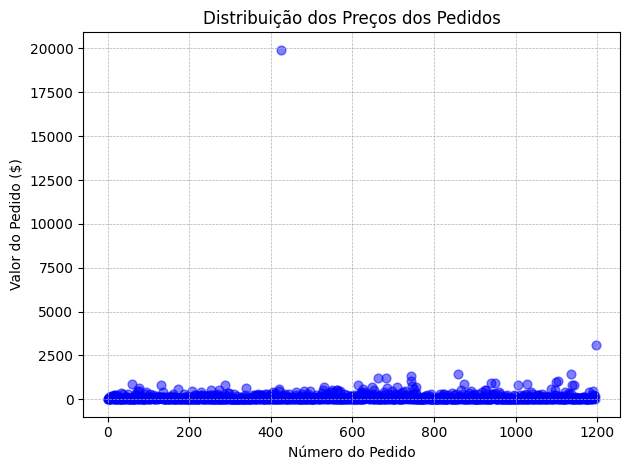

In [22]:
plt.scatter(range(len(orders)), orders['revenue'], alpha=0.5, s=40, color='blue')
plt.title('Distribuição dos Preços dos Pedidos')
plt.xlabel('Número do Pedido')
plt.ylabel('Valor do Pedido ($)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [23]:
orders['revenue'].quantile(0.95)

435.54

In [24]:
orders['revenue'].quantile(0.99)

900.9039999999999

In [25]:

conversions_A = merged_cumulative['transaction_id_A'].iloc[-1]
conversions_B = merged_cumulative['transaction_id_B'].iloc[-1]
visits_A = merged_cumulative['visits_A'].iloc[-1]
visits_B = merged_cumulative['visits_B'].iloc[-1]
p_A = conversions_A / visits_A
p_B = conversions_B / visits_B
d = p_B - p_A
SE = np.sqrt((p_A * (1 - p_A) / visits_A) + (p_B * (1 - p_B) / visits_B))
Z = d / SE
p_value = (1 - stats.norm.cdf(abs(Z))) * 2
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula: a diferença nas conversões entre os grupos é estatisticamente significativa")
else:
    print("Falhamos em rejeitar a hipótese nula: não há evidência suficiente para indicar uma diferença estatisticamente significativa nas conversões entre os grupos")

print('Valor-p:', p_value)


Rejeitamos a hipótese nula: a diferença nas conversões entre os grupos é estatisticamente significativa
Valor-p: 0.023156715674018447


A primeira parte do print sugere que há uma diferença estatisticamente significativa na taxa de conversão entre os Grupos A e B, uma vez que a hipótese nula foi rejeitada com um valor-p de 0.023.

In [26]:

orders_A = orders[orders['group'] == 'A']['revenue']
orders_B = orders[orders['group'] == 'B']['revenue']
t_stat, p_value = stats.ttest_ind(orders_A, orders_B)

if p_value < alpha:
    print("Rejeitamos a hipótese nula: há uma diferença significativa no tamanho médio do pedido entre os grupos A e B.")
else:
    print("Falhamos em rejeitar a hipótese nula: não há evidência suficiente para indicar uma diferença significativa no tamanho médio do pedido entre os grupos A e B.")
    
print('Valor-p:', p_value)



Falhamos em rejeitar a hipótese nula: não há evidência suficiente para indicar uma diferença significativa no tamanho médio do pedido entre os grupos A e B.
Valor-p: 0.4041179448526676


A análise inicial não encontrou uma diferença significativa no tamanho médio do pedido entre os Grupos A e B, já que a hipótese nula não foi rejeitada (valor-p: 0.404). Este resultado se manteve mesmo após a remoção de outliers, com um valor-p de 0.747.

In [27]:

orders_by_users = orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'})
orders_threshold = np.percentile(orders_by_users['transaction_id'], 95)
abnormal_users_num_orders = orders_by_users[orders_by_users['transaction_id'] > orders_threshold]['visitor_id']
revenue_threshold = np.percentile(orders['revenue'], 95)
abnormal_users_order_size = orders[orders['revenue'] > revenue_threshold]['visitor_id']
abnormal_users = pd.concat([abnormal_users_num_orders, abnormal_users_order_size]).drop_duplicates()
filtered_orders = orders[np.logical_not(orders['visitor_id'].isin(abnormal_users))]
filtered_cumulative_data = filtered_orders.groupby(['date', 'group']).agg({'transaction_id': 'nunique'}).groupby(level=1).cumsum().reset_index()
filtered_cumulative_data = pd.merge(filtered_cumulative_data, cumulative_visits, on=['date', 'group'])
filtered_cumulative_data['conversion'] = filtered_cumulative_data['transaction_id'] / filtered_cumulative_data['visits']
filtered_cumulative_A = filtered_cumulative_data[filtered_cumulative_data['group'] == 'A']
filtered_cumulative_B = filtered_cumulative_data[filtered_cumulative_data['group'] == 'B']
filtered_orders_A = filtered_cumulative_A['conversion']
filtered_orders_B = filtered_cumulative_B['conversion']
t_stat_filtered, p_value_filtered = stats.ttest_ind(filtered_orders_A, filtered_orders_B)
if p_value_filtered < alpha:
    print("Rejeitamos a hipótese nula: há uma diferença significativa na conversão entre os grupos A e B após filtrar os outliers.")
else:
    print("Falhamos em rejeitar a hipótese nula: não há evidência suficiente para indicar uma diferença significativa na conversão entre os grupos A e B após filtrar os outliers.")
    
print('Valor-p após filtrar os outliers:', p_value_filtered)



Rejeitamos a hipótese nula: há uma diferença significativa na conversão entre os grupos A e B após filtrar os outliers.
Valor-p após filtrar os outliers: 9.851177909978437e-16


Após a remoção de outliers, ainda há uma diferença significativa nas conversões entre os Grupos A e B, como indicado por um valor-p muito baixo (9.85e-16).

In [28]:

average_order_size_A = filtered_orders[filtered_orders['group'] == 'A']['revenue'].mean()
average_order_size_B = filtered_orders[filtered_orders['group'] == 'B']['revenue'].mean()

print('Tamanho médio do pedido para o Grupo A após filtrar os outliers: ${:.2f}'.format(average_order_size_A))
print('Tamanho médio do pedido para o Grupo B após filtrar os outliers: ${:.2f}'.format(average_order_size_B))
filtered_order_sizes_A = filtered_orders[filtered_orders['group'] == 'A']['revenue']
filtered_order_sizes_B = filtered_orders[filtered_orders['group'] == 'B']['revenue']
t_stat_order_size, p_value_order_size = stats.ttest_ind(filtered_order_sizes_A, filtered_order_sizes_B)
if p_value_order_size < alpha:
    print("Rejeitamos a hipótese nula: há uma diferença significativa no tamanho médio do pedido entre os grupos A e B após filtrar os outliers.")
else:
    print("Falhamos em rejeitar a hipótese nula: não há evidência suficiente para indicar uma diferença significativa no tamanho médio do pedido entre os grupos A e B após filtrar os outliers.")
    
print('Valor-p após filtrar os outliers:', p_value_order_size)



Tamanho médio do pedido para o Grupo A após filtrar os outliers: $81.69
Tamanho médio do pedido para o Grupo B após filtrar os outliers: $79.91
Falhamos em rejeitar a hipótese nula: não há evidência suficiente para indicar uma diferença significativa no tamanho médio do pedido entre os grupos A e B após filtrar os outliers.
Valor-p após filtrar os outliers: 0.7473338767580231


In [29]:
if p_value_order_size < alpha:
    if average_order_size_B > average_order_size_A:
        print("Pare o teste, considere o Grupo B como o líder.")
    else:
        print("Pare o teste, considere o Grupo A como o líder.")
elif p_value_order_size > alpha:
    print("Pare o teste, conclua que não há diferença significativa entre os grupos.")
else:
    print("Continue o teste para coletar mais dados.")
if p_value_order_size < alpha:
    if average_order_size_B > average_order_size_A:
        decision = "Pare o teste, considere o Grupo B como o líder."
    else:
        decision = "Pare o teste, considere o Grupo A como o líder."
elif p_value_order_size > alpha:
    decision = "Pare o teste, conclua que não há diferença significativa entre os grupos."
else:
    decision = "Continue o teste para coletar mais dados."

print(decision)



Pare o teste, conclua que não há diferença significativa entre os grupos.
Pare o teste, conclua que não há diferença significativa entre os grupos.


## conclusão final. 
Os Grupos A e B têm diferenças significativas em termos de taxa de conversão. Isso é consistente tanto antes como após a remoção de outliers, sugerindo que essa diferença é robusta e não é simplesmente um artefato de valores extremos.

Não há diferença estatisticamente significativa no tamanho médio do pedido entre os Grupos A e B, mesmo após a remoção de outliers. Isso sugere que, embora mais pessoas possam estar convertendo em um dos grupos (como indicado pelas análises de conversão), elas não estão, em média, fazendo pedidos de tamanhos diferentes.

As diversas hipóteses propostas para otimização da página/web têm diferentes graus de impacto e esforço associados. Essas hipóteses estão ranqueadas por ICE e RICE, fornecendo um guia sobre quais mudanças podem ser mais benéficas para testar em seguida, considerando o impacto potencial, a confiança nos resultados e o esforço necessário para implementá-las.

A conclusão de "Parar o teste, concluir que não há diferença significativa entre os grupos" sugere que, embora exista uma diferença significativa em termos de conversão, essa diferença não se traduziu em um aumento significativo no tamanho médio do pedido. Portanto, pode não haver um benefício financeiro claro em escolher uma das variantes sobre a outra, com base nos dados atuais.

Assim, a empresa pode considerar manter as operações como estão (sem escolher uma variante sobre a outra) e, em vez disso, focar em outras estratégias de otimização que foram identificadas e priorizadas nas hipóteses listadas.